In [7]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression 

In [2]:
# hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [3]:
# Linear regression model
model = nn.Linear(input_size, output_size)

In [4]:
# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [5]:
# train the model
for epoch in range(num_epochs):
    # convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch:{epoch+1}/{num_epochs}, Loss:{loss.item()}')


Epoch:5/60, Loss:0.18557576835155487
Epoch:10/60, Loss:0.18100015819072723
Epoch:15/60, Loss:0.17913277447223663
Epoch:20/60, Loss:0.1783626228570938
Epoch:25/60, Loss:0.17803697288036346
Epoch:30/60, Loss:0.1778915375471115
Epoch:35/60, Loss:0.17781904339790344
Epoch:40/60, Loss:0.17777614295482635
Epoch:45/60, Loss:0.17774531245231628
Epoch:50/60, Loss:0.177719384431839
Epoch:55/60, Loss:0.17769546806812286
Epoch:60/60, Loss:0.1776724010705948


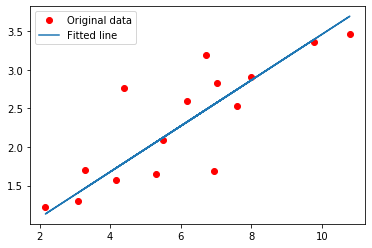

In [6]:
# plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Logistic Regression 

In [16]:
# hyper-parameters
input_size = 28 * 28
num_classes = 10
num_epochs = 5
batch_size = 64
learning_rate = 0.001

In [17]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='data/mnist/',
                                          train=True,
                                          transform=transforms.ToTensor(),
                                          download=True)
test_dataset = torchvision.datasets.MNIST(root='data/mnist/',
                                          train=False,
                                          transform=transforms.ToTensor())

In [18]:
# data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size*2,
                                         shuffle=False)

In [19]:
# logistic regression model
model = nn.Linear(input_size, num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [27]:
# train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    # training 
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size)
        
        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f"Epoch:{epoch+1}/{num_epochs}, Step:{i+1, total_step}, Loss:{loss.item()}")
            
    # validation
    # test the model
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, input_size)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum()
        print(f"valid_acc: {100 * correct / total}")

Epoch:1/5, Step:(938, 938), Loss:0.5630396604537964
valid_acc: 87
Epoch:2/5, Step:(938, 938), Loss:0.4204655587673187
valid_acc: 87
Epoch:3/5, Step:(938, 938), Loss:0.8806245923042297
valid_acc: 87
Epoch:4/5, Step:(938, 938), Loss:0.41806498169898987
valid_acc: 88
Epoch:5/5, Step:(938, 938), Loss:0.5852020382881165
valid_acc: 88
